# Read the **World Tallest mountains** dataset and perform some basic analysis to answer the following questions:

* Which are the most difficult mountains to climb?
* What were the most popular years for climbing?
* Are taller mountains more difficult to climb?
* Are mountains over 8000m more popular for climbing?
* Which mountain ranges contain the highest mountains?

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Mountains_cleaned.csv')
df.set_index('Mountain', inplace=True)

## **Add metrics needed to answer the 1st question**

In [3]:
df['Total attempts'] = df['Ascents bef. 2004'] + df['Failed attempts bef. 2004']
df['Success rate'] = (df['Ascents bef. 2004']/df['Total attempts'])*100
df['Difficulty'] = (df['Total attempts']/df['Success rate'] )*100
df['Difficulty'] = df['Difficulty'] / df['Difficulty'].max() # Normalizing
df = df.sort_values(by='Difficulty', ascending=False) # Shorting values

## **Plot the first 10 most difficult mountains to climb**

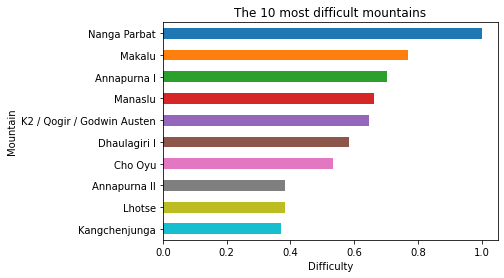

In [4]:
values = df[0:10]['Difficulty']
colormap = plt.cm.tab10(range(0, len(values)))
bar_plot = values.plot.barh(color=colormap)
bar_plot.set_title('The 10 most difficult mountains')
bar_plot.set_xlabel('Difficulty')
bar_plot.invert_yaxis()
plt.show()

## **What were the most popular years for climbing?**

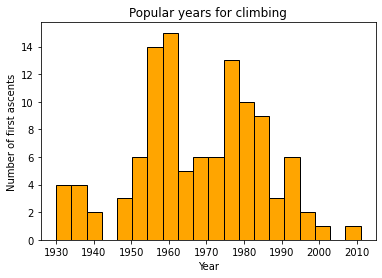

In [7]:
hist = df['First ascent'].plot.hist(bins=20, color='orange', edgecolor='black')
hist.set_xlabel('Year')
hist.set_ylabel('Number of first ascents')
hist.set_title('Popular years for climbing')
plt.show()

## **Are taller mountains more difficult to climb?**

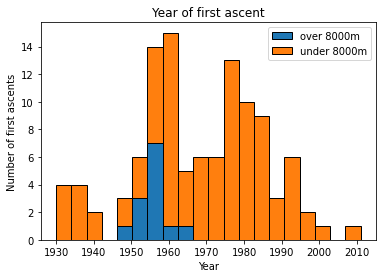

In [10]:
high = df['Height (m)'] > 8000
plt.hist([df.loc[high, 'First ascent'], df.loc[~high, 'First ascent']], stacked=True, edgecolor='black', bins=20)
plt.legend(['over 8000m','under 8000m'], loc='upper right')
plt.xlabel('Year')
plt.ylabel('Number of first ascents')
plt.title('Year of first ascent')
plt.show()

## **Are mountains over 8000m more popular for climbing?**

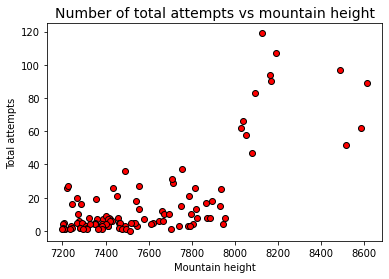

In [12]:
plt.scatter(df['Height (m)'], df['Total attempts'], color='red', edgecolor='black')
plt.ylabel('Total attempts')
plt.xlabel('Mountain height')
plt.title('Number of total attempts vs mountain height', fontsize=14)
plt.show()

## **Which mountain ranges contain the highest mountains?**

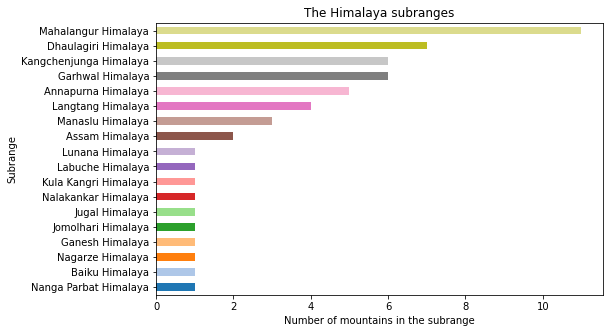

In [15]:
Himalaya = ['Himalaya' in str(x) for x in df['Range']]
count = df[Himalaya].groupby('Range').size()
count = count.sort_values()

plt.figure(figsize=(8,5))
colormap = plt.cm.tab20(range(0, len(count)))
plot = count.plot.barh(title='The Himalaya subranges', color=colormap)
plot.set_xlabel('Number of mountains in the subrange')
plot.set_ylabel('Subrange')
plt.show()